<a href="https://colab.research.google.com/github/uqmshawn/uqmshawn-4-7-1-8-4-5-3-0-r/blob/main/47184530.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import zipfile
import torch
import numpy as np
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import torch.nn.functional as F
from google.colab import drive
import zipfile

Mounted at /content/drive
+------------+--------------+------------------------+
| Data Split | Total Images |      Image Shape       |
+------------+--------------+------------------------+
|  Training  |     9664     | torch.Size([128, 128]) |
|  Testing   |     544      | torch.Size([128, 128]) |
| Validation |     1120     | torch.Size([128, 128]) |
+------------+--------------+------------------------+


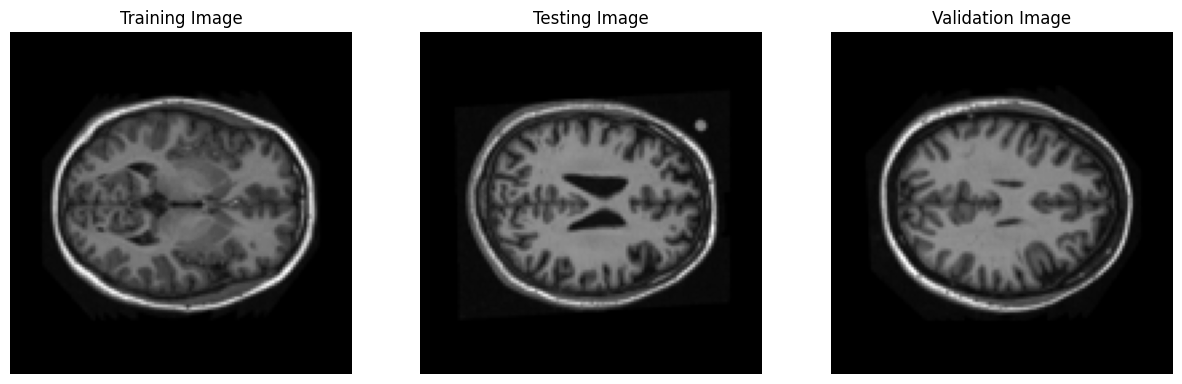

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 

In [3]:
# Ensure that PyTorch uses the GPU (if available) or CPU otherwise
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Mounting Google Drive to access files. Note: This is specific to Google Colab.
drive.mount('/content/drive')

# Define the directory where the output will be saved
OUTPUT_DIR = "/content/drive/MyDrive/Colab_Notebooks_Course/image_process/A3/OUTPUT2"

# Create the directory if it doesn't exist
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# Dataset class to handle brain slice images
class BrainSlicesDataset(Dataset):
    def __init__(self, image_slices):
        self.image_slices = image_slices

    def __len__(self):
        # Return the total number of image slices
        return len(self.image_slices)

    def __getitem__(self, idx):
        image = self.image_slices[idx]

        # Ensure the image has a channel dimension (grayscale images may not have one)
        if len(image.shape) == 2:  # If the image is of shape [Height, Width]
            image = torch.unsqueeze(image, 0)  # Convert it to [1, Height, Width]

        return image


# Function to load and extract image slices from a zip file
def get_image_slices():
    # Path to the zipped dataset
    zip_path = "/content/drive/MyDrive/Colab_Notebooks_Course/image_process/A3/testgans/GAN_Dataset.zip"
    extraction_path = "/content/GAN_Dataset"
    # Extract the zip file
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)

    # Define the directories for training, testing, and validation datasets
    parent_dir = "/content/GAN_Dataset"
    train_path = os.path.join(parent_dir, "keras_png_slices_train")
    test_path = os.path.join(parent_dir, "keras_png_slices_test")
    val_path = os.path.join(parent_dir, "keras_png_slices_validate")

    # Helper function to load images from a directory
    def load_images_from_folder(folder_path):
        images = []
        for filename in os.listdir(folder_path):
            # Open the image, convert to grayscale, and resize to 128x128 pixels
            img = Image.open(os.path.join(folder_path, filename)).convert('L').resize((128, 128))
            if img is not None:
                # Convert the image to a tensor and append to the list
                images.append(torch.tensor(np.array(img, dtype=np.float32)))
        return torch.stack(images)  # Convert list of tensors to a single tensor

    # Load images from each directory
    train_images = load_images_from_folder(train_path)
    test_images = load_images_from_folder(test_path)
    validate_images = load_images_from_folder(val_path)

    return train_images, test_images, validate_images


# Function to retrieve the image slices and provide a summary with a table and example images
def get_image_slices_with_table():
    train_images, test_images, validate_images = get_image_slices()

    # Display a summary table using PrettyTable
    table = PrettyTable()
    table.field_names = ["Data Split", "Total Images", "Image Shape"]
    table.add_row(["Training", len(train_images), train_images[0].shape])
    table.add_row(["Testing", len(test_images), test_images[0].shape])
    table.add_row(["Validation", len(validate_images), validate_images[0].shape])

    print(table)

    # Plot an example image from each dataset split
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(train_images[0], cmap='gray')
    axs[0].set_title("Training Image")
    axs[0].axis('off')

    axs[1].imshow(test_images[0], cmap='gray')
    axs[1].set_title("Testing Image")
    axs[1].axis('off')

    axs[2].imshow(validate_images[0], cmap='gray')
    axs[2].set_title("Validation Image")
    axs[2].axis('off')

    plt.show()

    return train_images, test_images, validate_images

# Call the function to display the dataset summary and example images
get_image_slices_with_table()

In [12]:
# # 2. Model Definitions

# # --- VectorQuantizer Layer ---
# # This layer is responsible for quantizing the continuous embeddings produced by the encoder into discrete codes.
# # It is the core component of the VQ-VAE which allows for a discrete latent representation.
# class VectorQuantizer(nn.Module):
#     def __init__(self, num_embeddings, embedding_dim, beta=0.25):
#         # `num_embeddings`: Number of embeddings (or clusters)
#         # `embedding_dim`: Dimensionality of each embedding
#         # `beta`: Weight for the commitment loss term
#         super(VectorQuantizer, self).__init__()
#         self.embedding_dim = embedding_dim
#         self.num_embeddings = num_embeddings
#         self.beta = beta
#         # Initialize the embeddings (cluster centers)
#         self.embeddings = nn.Parameter(torch.randn(embedding_dim, num_embeddings))

#     def forward(self, x):
#         # Reshape input tensor and calculate distances between input and embeddings
#         z_e_x = x.permute(0, 2, 3, 1).contiguous()
#         z_e_x_ = z_e_x.view(-1, self.embedding_dim)
#         distances = (torch.sum(z_e_x_**2, dim=1, keepdim=True)
#                     + torch.sum(self.embeddings**2, dim=0)
#                     - 2 * torch.matmul(z_e_x_, self.embeddings))
#         # Get the closest embedding index for each element in the batch
#         encoding_indices = torch.argmin(distances, dim=1).unsqueeze(1)
#         encodings = torch.zeros(encoding_indices.shape[0], self.num_embeddings).to(x.device)
#         encodings.scatter_(1, encoding_indices, 1)
#         encoding_indices = encoding_indices.view(*z_e_x.shape[:-1])
#         # Quantize the input tensor (replace input tensor values with their closest embeddings)
#         quantized = torch.matmul(encodings, self.embeddings.t()).view(*z_e_x.shape)
#         # Calculate the VQ-VAE loss
#         e_latent_loss = F.mse_loss(quantized.detach(), z_e_x)
#         q_latent_loss = F.mse_loss(quantized, z_e_x.detach())
#         loss = q_latent_loss + self.beta * e_latent_loss
#         # Add the straight-through estimator (for backpropagation)
#         quantized = z_e_x + (quantized - z_e_x).detach()
#         # Calculate the perplexity - a measure of how many embeddings are being used
#         avg_probs = torch.mean(encodings, dim=0)
#         perplexity = torch.exp(-torch.sum(avg_probs * torch.log(avg_probs + 1e-10)))
#         return loss, quantized.permute(0, 3, 1, 2).contiguous(), perplexity, encoding_indices

# # --- Encoder ---
# # This module encodes the input images into continuous embeddings.
# class Encoder(nn.Module):
#     def __init__(self, input_channels, hidden_channels, embedding_dim):
#         super(Encoder, self).__init__()
#         self.encoder = nn.Sequential(
#             # Convolutional layers with ReLU activations
#             nn.Conv2d(input_channels, hidden_channels, kernel_size=4, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(hidden_channels, hidden_channels // 2, kernel_size=4, stride=2, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(hidden_channels // 2, embedding_dim, kernel_size=3, padding=1)
#         )

#     def forward(self, x):
#         return self.encoder(x)

# # --- Decoder ---
# # This module decodes the discrete embeddings back into images.
# class Decoder(nn.Module):
#     def __init__(self, input_channels, hidden_channels):
#         super(Decoder, self).__init__()
#         self.decoder = nn.Sequential(
#             # Transposed convolutional layers with ReLU activations
#             nn.ConvTranspose2d(input_channels, hidden_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(hidden_channels, hidden_channels // 2, kernel_size=3, stride=2, padding=1, output_padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(hidden_channels // 2, 1, kernel_size=3, padding=1)
#         )

#     def forward(self, x):
#         return self.decoder(x)

# # --- VQVAE ---
# # The main VQ-VAE model which combines the encoder, vector quantizer, and decoder.
# class VQVAE(nn.Module):
#     def __init__(self, input_channels, hidden_channels, num_embeddings, embedding_dim):
#         super(VQVAE, self).__init__()
#         self.encoder = Encoder(input_channels, hidden_channels, embedding_dim)
#         self.quantize = VectorQuantizer(num_embeddings, embedding_dim)
#         self.decoder = Decoder(embedding_dim, hidden_channels)

#     def forward(self, x):
#         z = self.encoder(x)
#         loss, quantized, perplexity, _ = self.quantize(z)
#         x_recon = self.decoder(quantized)
#         return loss, x_recon, perplexity

# # --- VQVAETrainer ---
# # A training wrapper for the VQ-VAE which includes the reconstruction loss.
# class VQVAETrainer(nn.Module):
#     def __init__(self, train_variance, input_channels, hidden_channels, num_embeddings, embedding_dim):
#         super(VQVAETrainer, self).__init__()
#         # Variance of the training data, used for normalization of the reconstruction loss
#         self.train_variance = train_variance
#         self.vqvae = VQVAE(input_channels, hidden_channels, num_embeddings, embedding_dim)

#     def forward(self, x):
#         vq_loss, x_recon, perplexity = self.vqvae(x)
#         recon_loss = F.mse_loss(x_recon, x) / self.train_variance
#         loss = recon_loss + vq_loss
#         return x_recon, perplexity, loss

# # --- PixelConvLayer & PixelCNN ---
# # PixelCNN is an autoregressive model used for generating images pixel by pixel.
# # The PixelConvLayer is a masked convolutional layer used in the PixelCNN to ensure the autoregressive property.
# # PixelConvLayer & PixelCNN

# # Define a masked convolutional layer for PixelCNN
# class PixelConvLayer(nn.Module):
#     def __init__(self, in_channels, out_channels, kernel_size, mask_type, **kwargs):
#         super(PixelConvLayer, self).__init__()  # Initialize the parent class
#         self.mask_type = mask_type  # Define the type of mask ('A' or 'B')
#         # Compute padding to maintain spatial dimensions
#         self.padding = (kernel_size - 1) // 2
#         # Define the convolutional layer
#         self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, **kwargs, padding=self.padding)
#         # Clone the weights to create a mask
#         self.mask = self.conv.weight.data.clone()
#         # Create the mask upon initialization
#         self.create_mask()

#     # Define the forward pass
#     def forward(self, x):
#         # Apply the mask to the weights
#         self.conv.weight.data *= self.mask
#         # Return the convolved input
#         return self.conv(x)

#     # Define the mask creation logic
#     def create_mask(self):
#         _, _, H, W = self.conv.weight.size()
#         self.mask.fill_(1)  # Fill the mask with ones initially
#         # For 'A' type mask, mask the center and right half of the mask
#         self.mask[:, :, H // 2, W // 2 + (self.mask_type == 'A'):] = 0
#         # Mask the bottom half of the mask
#         self.mask[:, :, H // 2 + 1:] = 0

# # Define the main PixelCNN model
# class PixelCNN(nn.Module):
#     def __init__(self, input_shape, num_embeddings, embedding_dim):
#         super(PixelCNN, self).__init__()  # Initialize the parent class
#         self.input_shape = input_shape
#         self.embedding_dim = embedding_dim
#         self.num_embeddings = num_embeddings
#         self.layers = nn.ModuleList()  # List to hold the layers of the network
#         # Append the first layer with mask type 'A'
#         self.layers.append(PixelConvLayer(input_shape[0], embedding_dim, 7, mask_type='A'))
#         # Append five layers with mask type 'B'
#         for _ in range(5):
#             self.layers.append(PixelConvLayer(embedding_dim, embedding_dim, 7, mask_type='B'))
#         # Append the final layer to map to embeddings
#         self.layers.append(nn.Conv2d(embedding_dim, num_embeddings, 1))

#     # Define the forward pass
#     def forward(self, x):
#         for layer in self.layers:
#             x = F.relu(layer(x))  # Apply ReLU activation to each layer's output
#         return x

In [13]:
# # 3. Training Functions

# # Function to train the VQ-VAE model
# def train_vqvae(vqvae, train_loader, num_epochs, learning_rate, test_samples, recon_losses, vq_losses, perplexities):
#     # Define the optimizer
#     optimizer = optim.Adam(vqvae.parameters(), lr=learning_rate)
#     for epoch in range(num_epochs):  # Loop through each epoch
#         for batch_idx, images in enumerate(train_loader):  # Loop through each batch
#             images = images.to(device)  # Move images to device
#             optimizer.zero_grad()  # Zero out the gradients
#             x_recon, perplexity, loss = vqvae(images)  # Get the reconstructions, perplexity, and loss
#             # Compute the reconstruction and VQ losses
#             recon_loss_value = F.mse_loss(x_recon, images) / vqvae.train_variance
#             vq_loss_value = loss - recon_loss_value
#             # Record the losses and perplexity for visualization
#             recon_losses.append(recon_loss_value.item())
#             vq_losses.append(vq_loss_value.item())
#             perplexities.append(perplexity.item())
#             loss.backward()  # Backpropagate the error
#             optimizer.step()  # Update the weights
#         # Visualization at the end of each epoch
#         with torch.no_grad():
#             reconstructions, _, _ = vqvae(test_samples)
#             visualize_reconstructions(test_samples.cpu(), reconstructions.cpu())
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

#     # Plot the losses
#     plt.figure(figsize=(10,5))
#     plt.plot(recon_losses, label='Reconstruction Loss')
#     plt.plot(vq_losses, label='VQ Loss')
#     plt.legend()
#     plt.title('Losses over Training')
#     plt.xlabel('Training Iterations')
#     plt.ylabel('Loss Value')
#     plt.show()

#     # Plot the perplexities
#     plt.figure(figsize=(10,5))
#     plt.plot(perplexities)
#     plt.title('Perplexity over Training')
#     plt.xlabel('Training Iterations')
#     plt.ylabel('Perplexity')
#     plt.show()

#     # Plot a histogram of encoding indices
#     with torch.no_grad():
#         _, _, _, encoding_indices = vqvae.vqvae.quantize(vqvae.vqvae.encoder(test_samples))
#         encoding_indices = encoding_indices.flatten().cpu().numpy()
#     plt.figure(figsize=(10,5))
#     plt.hist(encoding_indices, bins=np.arange(vqvae.vqvae.quantize.num_embeddings+1)-0.5, rwidth=0.8)
#     plt.title('Histogram of Encoding Indices')
#     plt.xlabel('Encoding Index')
#     plt.ylabel('Frequency')
#     plt.xticks(np.arange(vqvae.vqvae.quantize.num_embeddings))
#     plt.show()

# # Function to train the PixelCNN model
# def train_pixelcnn(pixelcnn, train_loader, num_epochs, learning_rate):
#     # Define the optimizer and loss function
#     optimizer = optim.Adam(pixelcnn.parameters(), lr=learning_rate)
#     criterion = nn.CrossEntropyLoss()
#     for epoch in range(num_epochs):  # Loop through each epoch
#         for images in train_loader:  # Loop through each batch
#             optimizer.zero_grad()  # Zero out the gradients
#             logits = pixelcnn(images)  # Get the logits from the model
#             # Compute the loss
#             loss = criterion(logits, images.squeeze(1).long())
#             loss.backward()  # Backpropagate the error
#             optimizer.step()  # Update the weights
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# # 4. Visualization

# # Function to visualize original vs reconstructed images
# def visualize_reconstructions(originals, reconstructions, num_samples=3):
#     for i in range(num_samples):
#         fig, axs = plt.subplots(1, 2)
#         axs[0].imshow(originals[i, 0].detach().numpy(), cmap='gray')
#         axs[0].set_title("Original")
#         axs[1].imshow(reconstructions[i, 0].detach().numpy(), cmap='gray')
#         axs[1].set_title("Reconstruction")
#         plt.show()

# # Function to visualize generated samples
# def visualize_samples(samples, num_samples=3):
#     for i in range(num_samples):
#         plt.imshow(samples[i, 0].detach().numpy(), cmap='gray')
#         plt.title("Generated Sample")
#         plt.show()

# # Function to visualize generated samples from PixelCNN
# def visualize_pixelcnn_generation_batch(pixelcnn, batch_size, img_size=(1, 128, 128)):
#     # Create a batch of empty images
#     samples = torch.zeros(batch_size, *img_size).to(device)
#     # Generate images pixel by pixel using PixelCNN
#     for i in range(img_size[1]):
#         for j in range(img_size[2]):
#             out = pixelcnn(samples)
#             probs = F.softmax(out[:, :, i, j], dim=1)
#             for b in range(batch_size):
#                 samples[b, :, i, j] = torch.multinomial(probs[b], 1).float() / 255.0
#     # Display the generated images
#     for b in range(batch_size):
#         plt.imshow(samples[b, 0].cpu().detach().numpy(), cmap='gray')
#         plt.title(f"PixelCNN Generated Sample {b+1}")
#         plt.show()

# # Function to compare the original image with the one generated by PixelCNN
# def compare_original_and_generated(original, pixelcnn, img_size=(1, 128, 128)):
#     # Generate an image using PixelCNN
#     generated = torch.zeros(img_size).to(device)
#     for i in range(img_size[1]):
#         for j in range(img_size[2]):
#             out = pixelcnn(generated)
#             probs = F.softmax(out[:, :, i, j], dim=1)
#             generated[:, :, i, j] = torch.multinomial(probs, 1).float() / 255.0
#     # Visualize the original and generated images side by side
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))
#     axs[0].imshow(original[0, 0].cpu().detach().numpy(), cmap='gray')
#     axs[0].set_title("Original")
#     axs[1].imshow(generated[0, 0].cpu().detach().numpy(), cmap='gray')
#     axs[1].set_title("PixelCNN Generated")
#     plt.show()

Test samples for viz shape: torch.Size([3, 1, 128, 128])


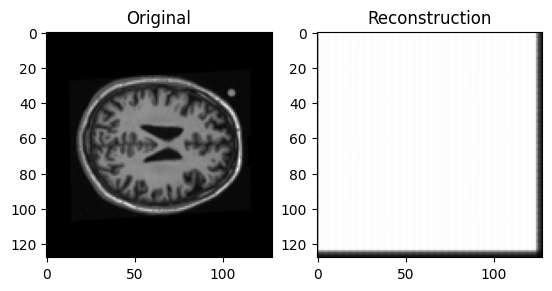

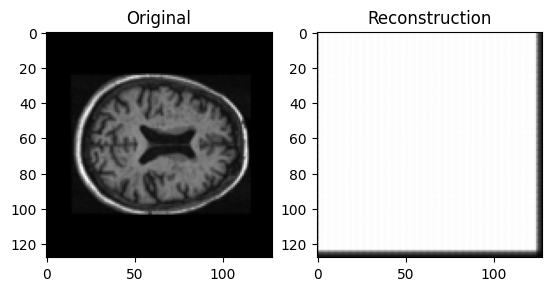

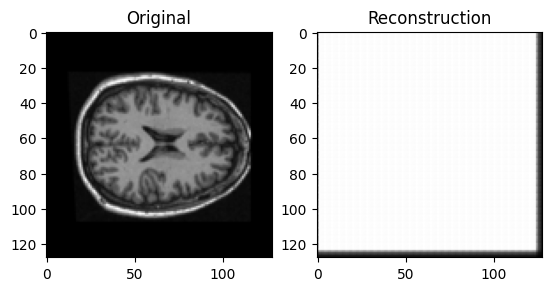

Epoch [1/1], Loss: 1.1509


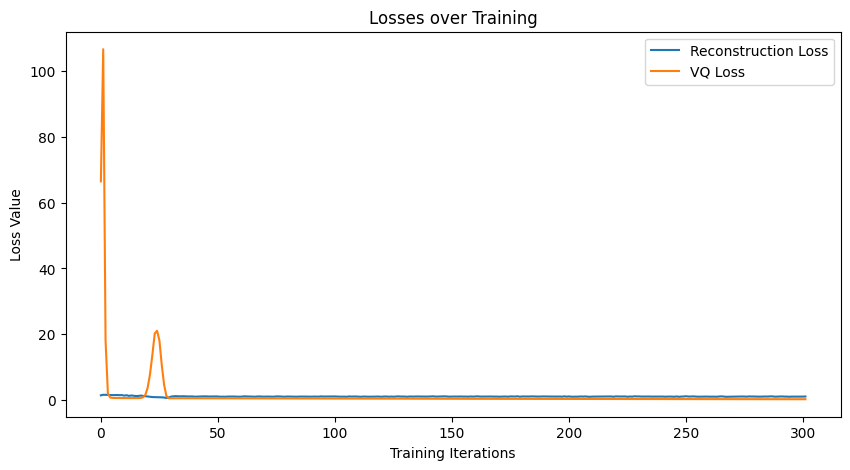

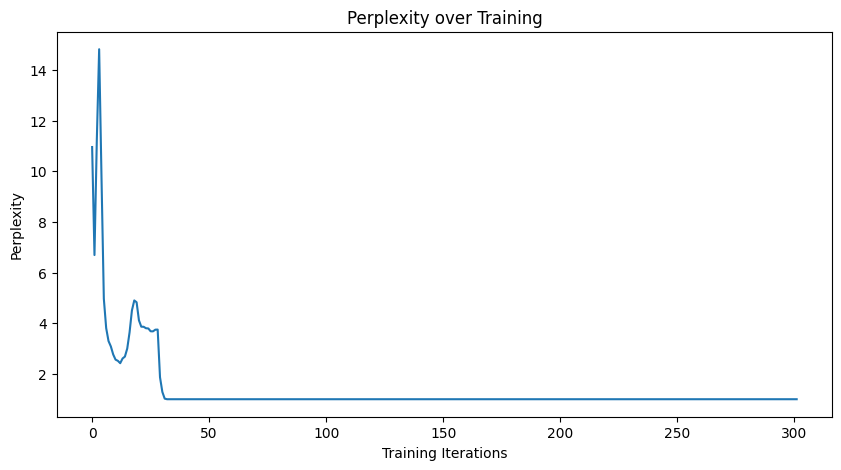

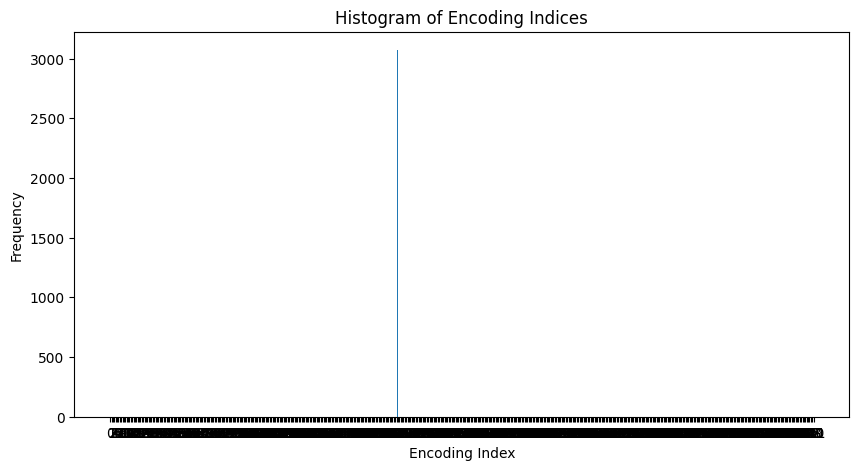

Epoch [1/1], Loss: 2.5587


TypeError: ignored

In [26]:
# 2. Model Definitions

# VectorQuantizer Layer
class VectorQuantizer(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, beta=0.25):
        super(VectorQuantizer, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.beta = beta
        self.embeddings = nn.Parameter(torch.randn(embedding_dim, num_embeddings))

    def forward(self, x):
        # Calculate distances and indices
        z_e_x = x.permute(0, 2, 3, 1).contiguous()
        z_e_x_ = z_e_x.view(-1, self.embedding_dim)
        distances = (torch.sum(z_e_x_**2, dim=1, keepdim=True)
                    + torch.sum(self.embeddings**2, dim=0)
                    - 2 * torch.matmul(z_e_x_, self.embeddings))
        encoding_indices = torch.argmin(distances, dim=1).unsqueeze(1)
        encodings = torch.zeros(encoding_indices.shape[0], self.num_embeddings).to(x.device)
        encodings.scatter_(1, encoding_indices, 1)
        encoding_indices = encoding_indices.view(*z_e_x.shape[:-1])
        quantized = torch.matmul(encodings, self.embeddings.t()).view(*z_e_x.shape)
        # Compute loss
        e_latent_loss = F.mse_loss(quantized.detach(), z_e_x)
        q_latent_loss = F.mse_loss(quantized, z_e_x.detach())
        loss = q_latent_loss + self.beta * e_latent_loss
        quantized = z_e_x + (quantized - z_e_x).detach()
        avg_probs = torch.mean(encodings, dim=0)
        perplexity = torch.exp(-torch.sum(avg_probs * torch.log(avg_probs + 1e-10)))
        return loss, quantized.permute(0, 3, 1, 2).contiguous(), perplexity, encoding_indices

# Encoder
class Encoder(nn.Module):
    def __init__(self, input_channels, hidden_channels, embedding_dim):
        super(Encoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(input_channels, hidden_channels, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels, hidden_channels // 2, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_channels // 2, embedding_dim, kernel_size=3, padding=1)
        )

    def forward(self, x):
        return self.encoder(x)
# Decoder
class Decoder(nn.Module):
    def __init__(self, input_channels, hidden_channels):
        super(Decoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(input_channels, hidden_channels, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(hidden_channels, hidden_channels // 2, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(hidden_channels // 2, 1, kernel_size=3, padding=1)
        )

    def forward(self, x):
        return self.decoder(x)



# VQVAE
class VQVAE(nn.Module):
    def __init__(self, input_channels, hidden_channels, num_embeddings, embedding_dim):
        super(VQVAE, self).__init__()
        self.encoder = Encoder(input_channels, hidden_channels, embedding_dim)
        self.quantize = VectorQuantizer(num_embeddings, embedding_dim)
        self.decoder = Decoder(embedding_dim, hidden_channels)

    def forward(self, x):
        z = self.encoder(x)
        loss, quantized, perplexity, _ = self.quantize(z)
        x_recon = self.decoder(quantized)
        return loss, x_recon, perplexity

# VQVAETrainer
class VQVAETrainer(nn.Module):
    def __init__(self, train_variance, input_channels, hidden_channels, num_embeddings, embedding_dim):
        super(VQVAETrainer, self).__init__()
        self.train_variance = train_variance
        self.vqvae = VQVAE(input_channels, hidden_channels, num_embeddings, embedding_dim)

    def forward(self, x):
        vq_loss, x_recon, perplexity = self.vqvae(x)
        recon_loss = F.mse_loss(x_recon, x) / self.train_variance
        loss = recon_loss + vq_loss
        return x_recon, perplexity, loss

# PixelConvLayer & PixelCNN
class PixelConvLayer(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, mask_type, **kwargs):
        super(PixelConvLayer, self).__init__()
        self.mask_type = mask_type
        self.padding = (kernel_size - 1) // 2
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, **kwargs, padding=self.padding)
        self.mask = self.conv.weight.data.clone()
        self.create_mask()
    def forward(self, x):
        self.conv.weight.data *= self.mask.to(self.conv.weight.device)
        return self.conv(x)
    def create_mask(self):
        _, _, H, W = self.conv.weight.size()
        self.mask.fill_(1)
        self.mask[:, :, H // 2, W // 2 + (self.mask_type == 'A'):] = 0
        self.mask[:, :, H // 2 + 1:] = 0

class PixelCNN(nn.Module):
    def __init__(self, input_shape, num_embeddings, embedding_dim):
        super(PixelCNN, self).__init__()
        self.input_shape = input_shape
        self.embedding_dim = embedding_dim
        self.num_embeddings = num_embeddings
        self.layers = nn.ModuleList()
        self.layers.append(PixelConvLayer(input_shape[0], embedding_dim, 7, mask_type='A'))
        for _ in range(5):
            self.layers.append(PixelConvLayer(embedding_dim, embedding_dim, 7, mask_type='B'))
        self.layers.append(nn.Conv2d(embedding_dim, num_embeddings, 1))
    def forward(self, x):
        for layer in self.layers:
            x = F.relu(layer(x))
        return x

# 3. Training Functions

def train_vqvae(vqvae, train_loader, num_epochs, learning_rate, test_samples, recon_losses, vq_losses, perplexities):
    optimizer = optim.Adam(vqvae.parameters(), lr=learning_rate)
    for epoch in range(num_epochs):
        for batch_idx, images in enumerate(train_loader):
            images = images.to(device)

            optimizer.zero_grad()
            x_recon, perplexity, loss = vqvae(images)

            # Record the losses and perplexity
            recon_loss_value = F.mse_loss(x_recon, images) / vqvae.train_variance
            vq_loss_value = loss - recon_loss_value
            recon_losses.append(recon_loss_value.item())
            vq_losses.append(vq_loss_value.item())
            perplexities.append(perplexity.item())

            loss.backward()
            optimizer.step()

        # Visualization at the end of each epoch
        with torch.no_grad():
            reconstructions, _, _ = vqvae(test_samples)
            visualize_reconstructions(test_samples.cpu(), reconstructions.cpu())


        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

    plt.figure(figsize=(10,5))
    plt.plot(recon_losses, label='Reconstruction Loss')
    plt.plot(vq_losses, label='VQ Loss')
    plt.legend()
    plt.title('Losses over Training')
    plt.xlabel('Training Iterations')
    plt.ylabel('Loss Value')
    plt.show()

    plt.figure(figsize=(10,5))
    plt.plot(perplexities)
    plt.title('Perplexity over Training')
    plt.xlabel('Training Iterations')
    plt.ylabel('Perplexity')
    plt.show()

    with torch.no_grad():
        _, _, _, encoding_indices = vqvae.vqvae.quantize(vqvae.vqvae.encoder(test_samples))
        encoding_indices = encoding_indices.flatten().cpu().numpy()

    plt.figure(figsize=(10,5))
    plt.hist(encoding_indices, bins=np.arange(vqvae.vqvae.quantize.num_embeddings+1)-0.5, rwidth=0.8)
    plt.title('Histogram of Encoding Indices')
    plt.xlabel('Encoding Index')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(vqvae.vqvae.quantize.num_embeddings))
    plt.show()

def train_pixelcnn(pixelcnn, train_loader, num_epochs, learning_rate):
    optimizer = optim.Adam(pixelcnn.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(num_epochs):
        for images in train_loader:
            images = images.to(device)  # Ensure images are on the correct device
            optimizer.zero_grad()
            logits = pixelcnn(images)
            loss = criterion(logits, images.squeeze(1).long())
            loss.backward()
            optimizer.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


# 4. Visualization

def visualize_reconstructions(originals, reconstructions, num_samples=3):
    # Visualization function for showing original vs reconstructed images
    for i in range(num_samples):
        fig, axs = plt.subplots(1, 2)
        axs[0].imshow(originals[i, 0].detach().numpy(), cmap='gray')
        axs[0].set_title("Original")
        axs[1].imshow(reconstructions[i, 0].detach().numpy(), cmap='gray')
        axs[1].set_title("Reconstruction")
        plt.show()

def visualize_samples(samples, num_samples=3):
    # Visualization function for generated samples
    for i in range(num_samples):
        plt.imshow(samples[i, 0].detach().numpy(), cmap='gray')
        plt.title("Generated Sample")
        plt.show()

def visualize_pixelcnn_generation_batch(pixelcnn, batch_size, img_size=(1, 128, 128)):
    # Create a batch of empty images
    samples = torch.zeros(batch_size, *img_size).to(device)

    # Generate images pixel by pixel
    for i in range(img_size[1]):
        for j in range(img_size[2]):
            out = pixelcnn(samples)
            probs = F.softmax(out[:, :, i, j], dim=1)
            for b in range(batch_size):
                samples[b, :, i, j] = torch.multinomial(probs[b], 1).float() / 255.0

    # Display the generated images
    for b in range(batch_size):
        plt.imshow(samples[b, 0].cpu().detach().numpy(), cmap='gray')
        plt.title(f"PixelCNN Generated Sample {b+1}")
        plt.show()

def compare_original_and_generated(original, pixelcnn, img_size=(1, 128, 128)):
    # Generate an image using PixelCNN
    generated = torch.zeros(img_size).to(device)
    for i in range(img_size[1]):
        for j in range(img_size[2]):
            out = pixelcnn(generated)
            probs = F.softmax(out[:, :, i, j], dim=1)
            generated[:, :, i, j] = torch.multinomial(probs, 1).float() / 255.0

    # Visualization
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(original[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[0].set_title("Original")
    axs[1].imshow(generated[0, 0].cpu().detach().numpy(), cmap='gray')
    axs[1].set_title("PixelCNN Generated")
    plt.show()


# 5. Main Function

def main():

    recon_losses = []
    vq_losses = []
    perplexities = []


    train_images, test_images, _ = get_image_slices()
    dataset = BrainSlicesDataset(train_images)
    train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

    # Some test samples for visualization
    test_samples_for_viz = torch.stack([test_images[i].unsqueeze(0) for i in range(3)]).to(device)


    # Initialize the VQ-VAE model
    vqvae_model = VQVAE(input_channels=1, hidden_channels=128, num_embeddings=512, embedding_dim=32).to(device)
    optimizer = torch.optim.Adam(vqvae_model.parameters(), lr=0.001)

    # Initialize and train VQVAE
    vqvae = VQVAETrainer(train_images.var(), 1, 128, 512, 32).to(device)
    print("Test samples for viz shape:", test_samples_for_viz.shape)
    train_vqvae(vqvae, train_loader, num_epochs=1, learning_rate=0.001, test_samples=test_samples_for_viz, recon_losses=recon_losses, vq_losses=vq_losses, perplexities=perplexities)

    # Initialize and train PixelCNN
    pixelcnn = PixelCNN((1, 128, 128), 256, 10).to(device)
    train_pixelcnn(pixelcnn, train_loader, num_epochs=1, learning_rate=0.001)

    # Generate and visualize images from PixelCNN
    with torch.no_grad():
        pixelcnn_generated_samples = torch.zeros(3, 1, 128, 128).to(device)  # batch of 3 empty images
        for i in range(128):
            for j in range(128):
                out = pixelcnn(pixelcnn_generated_samples)
                probs = F.softmax(out[:, :, i, j], dim=1)
                for b in range(3):  # For each image in the batch
                    pixelcnn_generated_samples[b, :, i, j] = torch.multinomial(probs[b], 1).float() / 255.0
        visualize_samples(pixelcnn_generated_samples)

    # Visualization
    with torch.no_grad():
        # Get some test images for reconstruction visualization
        test_samples = torch.stack([test_images[i] for i in range(3)]).to(device)
        reconstructions, _, _ = vqvae(test_samples)

        # Visualize reconstructions
        visualize_reconstructions(test_samples, reconstructions)

        # Visualize PixelCNN's generation (multiple images)
        visualize_pixelcnn_generation_batch(pixelcnn, batch_size=5)

        # Compare original and PixelCNN generated
        for i in range(3):  # For 3 examples
            compare_original_and_generated(test_samples[i], pixelcnn)

if __name__ == "__main__":
    main()